In [1]:
%matplotlib inline
import scipy
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("synthetic_dataset.csv")
df.rename(columns = {'Number Deliveries':'demand'}, inplace = True)
print(df.columns.tolist())
demand = df["demand"]
df = df[["X", "Y"]]
df["Y"] += 3000
data = df.to_numpy()

['Node ID', 'Node OSMID', 'X', 'Y', 'Node Weight', 'demand']


In [13]:
total_demand = demand.sum()
capacity = 1200
min_K = total_demand // capacity
min_K

833

In [4]:
def cost(data, R, Mu):
    N, D = data.shape # TODO
    K = Mu.shape[1] # TODO
    # TODO
    J = 0
    for k in range(K):
      J += np.dot(np.linalg.norm(data - np.array([Mu[:, k], ] * N), axis=1)**2, R[:, k])

    return J

In [5]:
def km_assignment_step(data, Mu):
    """ Compute K-Means assignment step
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        R_new: a NxK matrix of responsibilities
    """
    
    N, D = data.shape  # TODO: Number of datapoints and dimension of datapoint
    K =  Mu.shape[1] # number of clusters
    r = np.zeros((N, K))  # TODO
    # TODO assign all r[:, k]
    for k in range(K):
      r[:, k] = np.linalg.norm(data - np.array([Mu[:, k], ]*N), axis=1)**2

    arg_min = np.argmin(r, axis=1) # TODO: argmax/argmin along dimension 1
    R_new = np.zeros((N, K)) # TODO: Set to zeros/ones with shape (N, K)
    R_new[np.arange(N), arg_min] = 1 # TODO Assign to 1
    return R_new

In [6]:
# TODO: K-means Refitting Step
def km_refitting_step(data, R, Mu):
    """ Compute K-Means refitting step.
    
    Args:
        data: a NxD matrix for the data points
        R: a NxK matrix of responsibilities
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        Mu_new: a DxK matrix for the new cluster means locations
    """
    N, D =  data.shape # TODO: number of datapoints and dimension of datapoint
    K = Mu.shape[1] # TODO: number of clusters
    Mu_new =  (np.matmul(data.T, R))/np.sum(R, axis=0) # TODO
    return Mu_new

In [7]:
N, D = data.shape 
K = min_K
max_iter = 100
d = demand.to_numpy()

def capacitated_k_means(data, K, N, D, max_iter, demand):
  R = np.zeros((N, K))
  idx = np.random.choice(data.shape[0], size=K, replace=False)
  Mu = np.zeros([D, K])
  for i in range(K):
    Mu[:, i] = data[idx[i]]

  for it in range(max_iter):
    R = km_assignment_step(data, Mu) 
    Mu = km_refitting_step(data, R, Mu) 

  dpc = d.dot(R)
  utilization = np.where(dpc>capacity, dpc-capacity, dpc-capacity)
  if (np.sum(utilization) > 0):
    return capacitated_k_means(data, K + 1, N, D, max_iter, demand)
  return Mu, R

In [14]:
Mu, R = capacitated_k_means(data, K, N, D, max_iter, d)

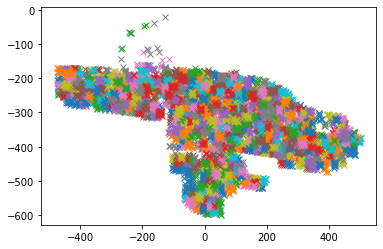

In [15]:
for i in range(R.shape[1]):
  cluster = np.where(R[:, i]) 
  plt.plot(data[cluster][:, 0], data[cluster][:, 1], "x")

In [19]:
print(R.shape)
dpc = d.dot(R)
utilization = np.where(dpc>capacity, dpc-capacity, dpc-capacity)
print(np.sum(utilization))

(5797, 834)
-800.0


In [20]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [21]:
%cd /content/drive/MyDrive/Colab Notebooks/ece1724 project

/content/drive/MyDrive/Colab Notebooks/ece1724 project


In [23]:
with open('R.npy', 'wb') as f:
    np.save(f, R)
with open('Mu.npy', 'wb') as f:
    np.save(f, Mu)